<p id="part0"></p>

<p style="font-family: Arials; line-height: 2; font-size: 24px; font-weight: bold; letter-spacing: 2px; text-align: center; color: #FF8C00;"> <a href="#part0" style="color:#FF8C00; text-decoration:none;">Відстань Пірсона, Розподіл Хі-квадрат Пірсона</a></p>


<p style="font-family: Arials; font-size: 16px; font-style: normal; font-weight: bold; letter-spacing: 2px; color: #0099FF; line-height:1.3"><a href="#part2" style="color:#808080; text-decoration:none;">Критерій Хі-квадрат Пірсона з корекцією безперервності Єйтса</a></p>

<p style="font-family: Arials; font-size: 16px; font-style: normal; font-weight: bold; letter-spacing: 2px; color: #808080; line-height:1.3"><a href="#part3" style="color:#808080; text-decoration:none;">Перевірка  відповідності розподілу даних до нормального розподілу</a></p>


[Ланкастер](https://uk.wikipedia.org/wiki/Розподіл_хі-квадрат) показав зв'язок між біноміальним, нормальним і $\chi^2$ розподілами, як показано нижче. Де Муавр і Лаплас встановили, що біноміальний розподіл можна наблизити через нормальний розподіл. Точніше вони показали асимптотичну нормальність випадкової величини

$\displaystyle \chi ={m-Np \over {\sqrt {(Npq)}}},$
де m — це спостережена кількість успіхів в N спробах, де ймовірність успіху p, а q = 1 − p.

Підносимо до квадрату обидві частини рівняння

$\displaystyle \chi ^{2}={(m-Np)^{2} \over (Npq)}$
Використовуючи N = Np + N(1 − p), N = m + (N − m), та q = 1 − p, це рівняння спрощується до

$\displaystyle \chi ^{2}={(m-Np)^{2} \over (Np)}+{((N-m)-Nq)^{2} \over (Nq)}$
Вираз праворуч має форму яку Пірсон узагальнив до:

$\displaystyle \chi ^{2}=\sum _{i=1}^{n}{\frac {(O_{i}-E_{i})^{2}}{E_{i}}},$
де

$\displaystyle \chi ^{2}$ — кумулятивна тестова статистика Пірсона, яка асимптотично наближується до $\displaystyle \chi ^{2}$ розподілу.
$\displaystyle O_{i}$ — кількість спостережень типу i.
$\displaystyle E_{i}-Np_{i}$ — очікувана (теоретична) частота типу i, згідно з нульовою гіпотезою, яка стверджує, що частка типу i в популяції становить ${\displaystyle p_{i}}p_{i}
{\displaystyle n}n$ — кількість комірок в таблиці.
У випадку біноміального виходу (підкидання монети), біноміальний розподіл можна апроксимувати через нормальний (для досить великих n). З того, що квадрат нормального розподілу — це розподіл хі-квадрат з одним ступенем вільності, ймовірність результату як-от 1 аверс з 10 спроб, можна апроксимувати через нормальний розподіл чи розподіл хі-квадрат. Однак, багато задач потребують більше ніж два виходи як у біноміальному випадку, натомість вони потребують 3 або більше категорій, що призводить до поліноміального розподілу. Просто де Муавр і Лаплас шукали і знайшли нормальне наближення до біноміального, Пірсон шукав і знайшов багатовимірне нормальне наближення до поліноміального розподілу. Пірсон показав, що розподіл хі-квадрат, сума багатьох нормальних розподілів, був таким наближенням до поліноміального розподілу

<p id="part1"></p>
<p style="font-family: Arials; font-size: 16px; font-style: normal; font-weight: normal; letter-spacing: 3px; color: #FF8C00; line-height:1.0">Importing libraries</p>

<p style="text-align: right;"><a href="#part0" style="color:#FF8C00; text-decoration:none;">зміст</a></p>

In [36]:
# import warnings
# warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import math
import seaborn as sns
from scipy.stats import chisquare

[latex ](https://latexeditor.lagrida.com/)

# Приклад
Підкинимо монетку N разів та зафіксуємо отримані показники: n випадків події - решка або N-n випадків події орел (tail, eagle)

нульова гіпотеза $H_0 = 0.5$, тобто $\frac{1}{2}$ це вірогідність того що випаде орел до решки (тобто очікуваний (expected) розподіл становить 1:1), а $n = N-n$

альтернативна гіпотеза $H_1 \neq  0.5$ , тобто вірогідність того що випаде орел до решки не відповідає вірогідності $\frac{1}{2}$ або розподіл який спостерігається (observed) ВІДМІННИЙ від 1:1, а $n \neq N-n$

Є $N=60$ єкспериментальних випадків підкидання монети, з яких 20 разів випала решка 40 разів орел

O - observed (спостерігається)

E - expected (очікується)


Efect                     | Орел          | Решка
--------------------------|:--------------:|:--------------:
P                         |$$\frac{1}{2}$$|$$\frac{1}{2}$$
Observed                  |20             |40
Expected                  |30             |30
$$\chi^2 $$ |$$\frac{(20-30)^2}{30} + \frac{(40-30)^2}{30} \approx 6.7$$

$$\chi^2 = \sum_{i=1}^{n}\frac{(Observed_i-Expected_i)^2}{Expected_i}$$

In [37]:
tail_eagle=[[40], [20]]
stats.chisquare(tail_eagle) # решка 40 орел 20 або stats.chisquare([40,20])

Power_divergenceResult(statistic=array([6.66666667]), pvalue=array([0.00982327]))

In [38]:
stats.chisquare(tail_eagle, f_exp=[[30],[30]])

Power_divergenceResult(statistic=array([6.66666667]), pvalue=array([0.00982327]))

<p id="part2"></p>

# Критерій Хі-квадрат Пірсона з корекцією безперервності Єйтса

<p style="text-align: right;"><a href="#part0" style="color:#FF8C00; text-decoration:none;">зміст</a></p>

(Pearson"s Chi-squared test with Yates" continuity correction)

При проведенні тесту хі-квадрат перевіряється взаємна незалежність двох змінних таблиці сполученості та завдяки цьому опосередковано з'ясовується залежність обох змінних. Дві змінні вважаються взаємно незалежними, якщо частоти (fo), що спостерігаються, в осередках збігаються з очікуваними частотами (fe).

> Якщо таблиця сполучення має чотири поля (таблиця 2 x 2) і очікувана ймовірність менше 5, додатково виконується точний **тест Фішера.**

**Коректність проведеннятесту хі-квадрат визначається двома умовами:**

* очікувані частоти< 5 повинні зустрічатися не більш ніж у 20% полів таблиці;
* суми за рядками та стовпцями завжди повинні бути більшими за нуль.

Слід зазначити, що наведена вище формула критерію ($\chi^2$) дає кілька завищені значення під час роботи з таблицями спряженості розміром 2х2. Причина полягає в тому, що розподіл самого критерію \($\chi^2$) є безперервним, тоді як частоти бінарних ознак ("загинув"/"вижив") за визначенням дискретні. У зв'язку з цим при розрахунку критерію прийнято запроваджувати т.зв. поправку на безперервність, або поправку Єтса :

$$\chi^2_{Yates} = \sum^{k}\frac{(|f_o - f_e| - 0.5)^2}{f_e}$$

**Розрахунок ступенів свобод:** $df=(n-1)(m-1)$ де n-кількість стовбчиків, m - кількість строк
якщо ж в таблиці лише 1 строка (m=1) то $df=n-1$
# Приклад:

Чи є взаємозв'язок між професією та статтю: $H_0$-взаємозв'язок відсутній $H_1$ - наявний певний взаємозв'язок



<center> Фактичні дані

Професія/Стать |Чоловіча |Жіноча |Взагалом
---------------:|:---------:|:-------:|:---------:
Біологи|15|9|$$\bbox[red, 8px]{24}$$
Інформатики|11|6|$$\bbox[lightpink, 8px]{17}$$
Сума|$$\bbox[lime, 8px]{26}$$|$$\bbox[lightblue, 8px]{15}$$|$$\bbox[purple, 8px]{41}$$

<center> Очікувані дані

Професія/Стать |Чоловіча |Жіноча |Взагалом
---------------:|:---------:|:-------:|:---------:
Біологи|$$15.2\approx\frac{\bbox[lime, 8px]{26}*\bbox[red, 8px]{24}}{\bbox[purple, 8px]{41}}$$|$$8.8\approx\frac{\bbox[red, 8px]{24}*\bbox[lightblue, 8px]{15}}{\bbox[purple, 8px]{41}}$$|24
Інформатики|$$10.8\approx\frac{\bbox[lime, 8px]{26}*\bbox[lightpink, 8px]{17}}{\bbox[purple, 8px]{41}}$$|$$6.2\approx\frac{\bbox[lightpink, 8px]{17}*\bbox[lightblue, 8px]{15}}{\bbox[purple, 8px]{41}}$$|17
Сума|26|15|41

$$\chi^2 = \frac{(15-15.2)^2}{15.2}+\frac{(9-8.8)^2}{8.8}+\frac{(11-10.8)^2}{10.8}+\frac{(6-6.2)^2}{6.2}=0.0173323$$

$$\chi^2_{Yates} = \frac{(|15-15.2|-0.5)^2}{15.2}+\frac{(|9-8.8|-0.5)^2}{8.8}+\frac{(|11-10.8|-0.5)^2}{10.8}+\frac{(|6-6.2|-0.5)^2}{6.2}=0.0389977877$$

In [39]:
𝑂𝑏𝑠𝑒𝑟𝑣𝑒𝑑 = [15,11,9,6] # отримані частоти в експерименті
𝐸𝑥𝑝𝑒𝑐𝑡𝑒𝑑 = [15.2,10.8,8.8,6.2] # розраховані очікувані частоти fij = fi*fj/N 
stats.chisquare(Observed, f_exp=Expected) #ddof= вказує на кількість ступенів свобод, та використовується для розрахунку p_value 

Power_divergenceResult(statistic=0.01733235009975241, pvalue=0.9993962628484344)

In [40]:
# Отримаємо очікувані результати розполілу частот
tab_data = [[15,11], [9,6]]
g, p, dof, expctd = stats.chi2_contingency(tab_data)# g = G test, p = probability,dof = degree of fredom, expctd = 𝐸𝑥𝑝𝑒𝑐𝑡𝑒𝑑 frequency 
expctd

array([[15.2195122, 10.7804878],
       [ 8.7804878,  6.2195122]])

In [41]:
E = expctd.flatten() # Out: [15.2195122, 10.7804878, 8.7804878,  6.2195122]
O = sum(tab_data,[]) # Out: [15, 11, 9, 6]
stats.chisquare(O, f_exp=E)

Power_divergenceResult(statistic=0.020871040723981833, pvalue=0.999203075215488)

In [42]:
uniform = [sum(sum(tab_data,[]))/len(sum(tab_data,[]))]*len(sum(tab_data,[]))
stats.chisquare(Observed, f_exp=uniform) # p>0.05 частоти з 95% вірогідністю відповідають рівномірному розподілу

Power_divergenceResult(statistic=4.170731707317072, pvalue=0.2436085811399053)

In [43]:
stats.chisquare(E, f_exp=uniform)

Power_divergenceResult(statistic=4.232367493216871, pvalue=0.2374411987083843)

# Знову про монетку

Розподіл рівномірний


(          Орел  Решка
 observed  59.0   41.0
 expected  50.0   50.0,
 3.24,
 0.07186063822585143)

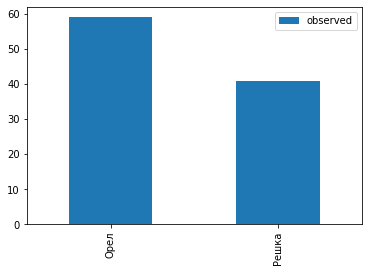

In [44]:
def monet(size=60, tail = None, eagle = None):
    if tail == None or eagle == None:
        arr = [np.random.randint(2) for _ in range(size)]
        tail, eagle = 0, 0
        for i in arr:
            if i == 0:
                tail += 1
            else:
                eagle += 1
    expected_num = size / 2            
    df = pd.DataFrame({'Орел': [eagle, expected_num],
                      'Решка': [tail, expected_num]}, index = ['observed','expected'])
    df.loc['observed'].to_frame().plot(kind='bar')

    chi_2, p_2 = stats.chisquare([tail,eagle])
    if p_2 < 0.05:
        print(f'Відхиляємо H0, {p_2} < 0.05. Наш розподіл нерівномірний')
    else:
        print('Розподіл рівномірний')
    return df, chi_2, p_2

# monet(tail=20, eagle=40)
monet(100)

Змоделюємо на Python:

Напишемо функцію підкидання монети 60 разів, що вважає скільки разів випав орел, скільки решка і повертає обчислену відстані хі-квадрат для результату даних підкидань:

In [45]:
import random
from math import sqrt

def distance_chi_square_from_toss_coin():
    eagles = 0
    tails = 0
    # підкидання монети 60 раз
    for i in range(60):
        if random.randint(0,1):
            eagles += 1
        else:
            tails += 1
    # розраховуємо відстань хі-квадрат Пірсона: 
    # ((O1 - E1)|sqrt(E1))^2 + ... + ((On - En)|sqrt(En))^2
    return (
        (eagles-30)**2/30 + (tails-30)**2/30
    )

Проведемо експеримент 10 тис. разів:

In [46]:
# робимо експеримент 10 тис. разів,
# у кожному з яких по 60 разів будемо підкидати монету
# і зберігати значення відстані хі-квадрат, що повертається
list_of_chi_square = []
for i in range(10000):
    list_of_chi_square.append(distance_chi_square_from_toss_coin())

Подивимося на отриманий розподіл:

C:\Users\GbreH\Desktop\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

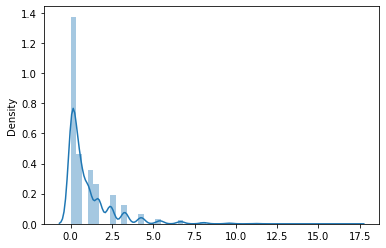

In [47]:
import seaborn as sns

sns.distplot(list_of_chi_square)

(array([8.406e+03, 1.088e+03, 2.320e+02, 1.940e+02, 4.300e+01, 2.300e+01,
        9.000e+00, 4.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0.        ,  1.70666667,  3.41333333,  5.12      ,  6.82666667,
         8.53333333, 10.24      , 11.94666667, 13.65333333, 15.36      ,
        17.06666667]),
 <BarContainer object of 10 artists>)

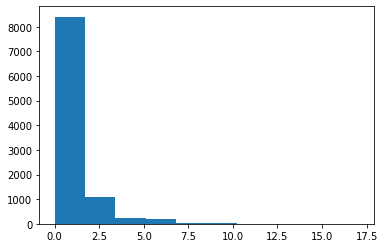

In [48]:
import matplotlib.pyplot as plt

plt.hist(list_of_chi_square)

Згадаймо про наш експеримент у попередньому степу і який розподіл вийшов там, коли отримали 40 орлів!

In [49]:
#подивимося ще раз на значення, яке ми отримували в нашому
#конкретному спостереженні з випаданням орла і решки (коли отримали 40 орлів!):
exp_eagles = 40
exp_tails = 20
# розраховуємо відстань хі-квадрат Пірсона:
# ((O1 - E1)|sqrt(E1))^2 + ... + ((On - En)|sqrt(En))^2
res_of_exp_chi_2 = (exp_eagles-30)**2/30 + (exp_tails-30)**2/30
print(res_of_exp_chi_2)

6.666666666666667


Як бачимо на графіку є як 6.67, так і більш екстремальні значення справа (навіть он 14 є!), але нам цікаво, яка частина всіх експериментів показує подібні або навіть великі значення відстані хі-квадрат (тобто яка частка всіх експериментів з 10 тис. разів показали такі або більше виражені відмінності в спостережуваних і очікуваних результатах випадання орла і решки):

In [50]:
# подивимося % значень з рівним або великим значенням нашого конкретного спостереження:
count_of_result_or_more_like_we_see = 0
for i in list_of_chi_square:
    if i >= res_of_exp_chi_2:
        count_of_result_or_more_like_we_see += 1;
print(count_of_result_or_more_like_we_see)

161


Бачимо, що 138 із 10 тисяч наших експериментів випадково дали таке чи більше значення відстані хі-квадрат.

Яка можливість отримати таке спостереження випадково?

In [51]:
# % ймовірності отримати такі розбіжності
print(count_of_result_or_more_like_we_see / len(list_of_chi_square))

0.0161


Або з ймовірністю 1.38% ми могли отримати таке (40 разів!) випадання орла у 60-ти підкиданнях чесної монети.

ps:

стало цікаво, а яка можливість випадання всіх орлів?

In [52]:
res_of_exp_chi_2_60 = (60-30)**2/30 + (0-30)**2/30
print(res_of_exp_chi_2_60)

60.0


In [53]:
count_of_result_60 = 0
for i in list_of_chi_square:
    if i >= res_of_exp_chi_2_60:
        count_of_result_60 += 1;
print(count_of_result_60)

0


У нашому випадковому моделюванні із 10 тис. разів - такої ситуації не зустрілося. Не знайдемо ми її серед 1 млн. експериментів. Але, звичайно, ймовірність є)

<p id="part3"></p>

# Перевірка  відповідності розподілу даних до нормального розподілу

# Приклад

При рівні значимості 0,05 перевірити гіпотезу про нормальний розподіл генеральної сукупності, якщо відомі емпіричні та теоретичні частоти:

Емпіричні частоти: 6 13 38 74 106 85 30 14

Теоретичні частоти: 3 14 42 82 99 76 37 13

Розрахуємо $\chi^2$ = 7,19, Оскільки pvalue >0.05, немає підстав відкидати нульову гіпотезу. Дані спостережень узгоджуються з гіпотезою про нормальний розподіл генеральної сукупності.

In [54]:
stats.chisquare([6, 13, 38, 74, 106, 85, 30, 14], f_exp=[3, 14, 42, 82, 99, 76, 37, 13])

Power_divergenceResult(statistic=7.194855127140108, pvalue=0.40887768586437173)

In [55]:
# https://kineziolog.su/content/proverka-vyborki-na-normalnost-raspredeleniya-khi-kvadrat


In [56]:
# Розрахунки теоретичних частот нормального розподілу
# http://mathhelpplanet.com/static.php?p=kriterii-soglasiya
# http://mathprofi.ru/kriteriy_soglasiya.html
# https://studfile.net/preview/5716282/page:7/

# Розрахуємо теоретичні частоти нормального розподілу

In [57]:
class FrequencyDistributionNormal():
    
    def __init__(self, sample):
        self.sample = np.array(sample)
        self.std = self.sample.std()
        self.average = self.sample.mean()
        self.num_intervals = self.get_num_intervals()#
        self.min_value = self.sample.min()
        self.max_value = self.sample.max()
        self.step_intervals = self.get_step_intervals()
        self.groups_intervals = self.get_groups_intervals()
        self.index = self.groups_intervals.index
        self.count_into_intervals, self.mean_into_intervals = self.get_counts_and_means_list()
        self.z_score = self.get_z_score()
        self.f_from_z_score = self.get_f_from_z_score()
        self.frequencies = self.get_frequencies()
        self.corrected_frequency = self.get_corrected_frequency()
     
         
    def get_num_intervals(self):
        """ кількість (m) інтервалів, яка розраховується за формулою:
                                  m = (10 * n)^1/3, 
            де n - обсяг вибірки (кількість елементів сокупності)"""
        return math.ceil((len(self.sample)*10)**(1/3))
    
    def get_step_intervals(self):
        """ крок (h) від інтервалу до наступного інтервалу розраховується інтервал
        за формулою                h = min - max / (m - 1),
        де min, max - мінімальне та максимальне значення елементів виборочної сукупності
        m - кількість інтервалів
        """
        return (self.max_value - self.min_value)/(self.num_intervals-1)
    
    @property
    def amount_of_intervals(self): # get amount_of_intervals value
        return self.num_intervals
           
    @amount_of_intervals.setter
    def set_amount_of_intervals(self, value): # set up amount_of_intervals value
        if value == None:
            self.num_intervals = self.get_amount_of_intervals()
        else:
            self.num_intervals = value
    
    @property
    def sequence_step(self):
        return self.step_intervals
    
    @sequence_step.setter
    def set_sequence_step(self, value):
        if not isinstance(value, (int, float, None)):
            self.step_intervals = self.get_step_intervals()
            raise TypeError('value is not a int or float')
        else:
            self.step_intervals = value

    def get_groups_intervals(self):
        """повертає список з нижньою та верхньою границею кожного інтервала"""
        bins = np.concatenate(([-np.inf], np.arange(self.min_value, self.max_value,
                                                    self.step_intervals), [np.inf]))
        pandas_series = pd.Series(self.sample)
        return pandas_series.groupby(pd.cut(self.sample, bins), observed=True).\
            apply(lambda x: x.to_list())

    def get_counts_and_means_list(self):
        """повертае список з підрахованою кількістю елементів вибіркової сукупності
        в кожному з інтервалів"""
        mean_groups = []
        count_groups = []
        for i in  self.groups_intervals.array:
            mean_groups.append(np.mean(i))
            count_groups.append(len(i))
        return np.array(count_groups), np.array(mean_groups)
        
    def get_z_score(self):
        return (self.mean_into_intervals-self.average)/self.std
    
    def get_f_from_z_score(self):
        f = lambda z, sd: (1/(2*math.pi)**0.5)*math.e**(-((z)**2/(2)))
        return f(self.z_score, self.std)
    
    def get_frequencies(self):
        return (self.f_from_z_score*self.step_intervals/self.std)*self.count_into_intervals.sum()
    
    def get_corrected_frequency(self):
        return (self.count_into_intervals.sum()*self.frequencies)/self.frequencies.sum()
    
    def get_summary_dataframe(self):
        df = pd.DataFrame(index=self.index) 
        df['std'] = self.std
        df['average'] = self.average
        df['m'] = self.num_intervals
        df['h'] = self.step_intervals
        df['mean_group'] = self.mean_into_intervals
        df['count'] = self.count_into_intervals
        df['z'] = self.z_score
        df['f(z)'] = self.f_from_z_score
        df['frequencies'] = self.frequencies
        df['corrected_frequency'] = self.corrected_frequency
       
        return df

#### Сгенеруємо 1000 вибіркових сукупностей із нормального розподілу та підрахуємо кількість відкинутих нульових гіпотез за $\chi^2$ при p<0.05, p<0.01 та p<0.001

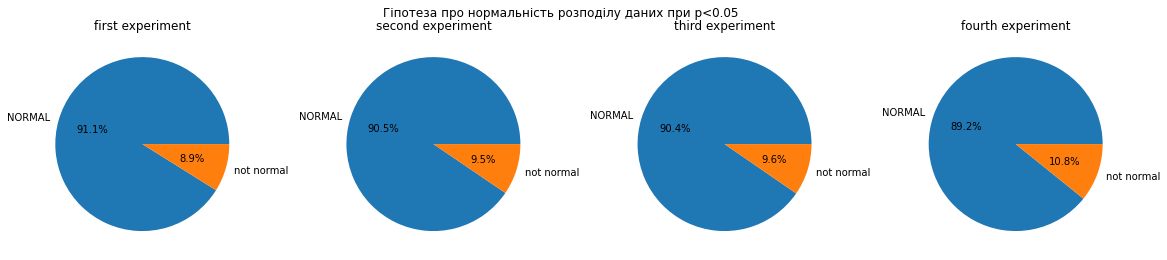

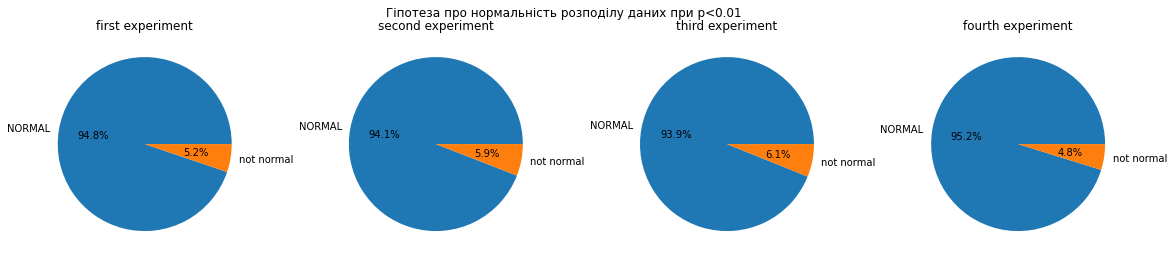

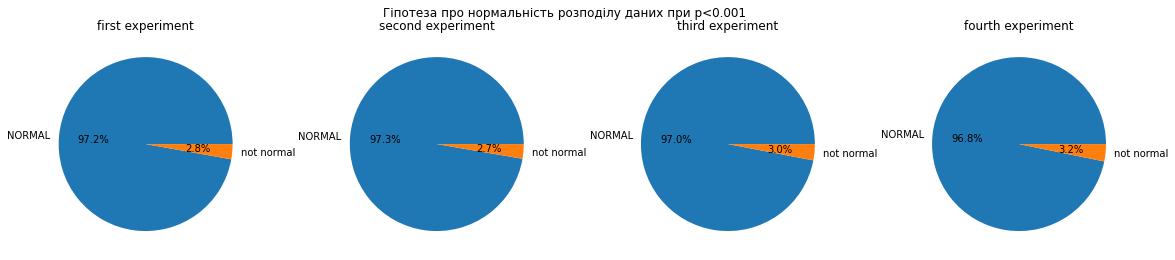

In [58]:
def result(alpha):
    coun = []
    for i in range(1000):
        sample = np.random.normal(loc=0, scale=1, size=100)
        fdn  = FrequencyDistributionNormal(sample)
        df = fdn.get_summary_dataframe()
        stat, p_value = stats.chisquare(df['count'], f_exp=df['corrected_frequency'])
        if p_value < alpha:
            coun.append(1)
        else:
            coun.append(0)
    return {'NORMAL':coun.count(0), "not normal":coun.count(1)}

def ploting_pie(ax, n, alpha):
    res = result(alpha)
    ax.pie([float(res[v]) for v in res], labels=[str(k) for k in res], autopct='%1.1f%%')
    ax.set_title(f'{n} experiment')
    
def main_pie_plot(alpha):    
    fig, axs = plt.subplots(ncols=4, figsize=(20, 4))
    n_experiment = ['first', 'second', 'third', 'fourth']
    fig.suptitle(f'Гіпотеза про нормальність розподілу даних при р<{alpha}')
    for n, ax in zip(n_experiment, axs):
        ploting_pie(ax, n, alpha)

for alpha in [0.05,0.01,0.001]:
    main_pie_plot(alpha)

Таким чином при 95% довірчому значенні р<0,05 кількість хибно відкинутих нульових гіпотез була в інтервалі від 9,5 до 12%, при р<0,01 (5.1-6.3%) а при р<0,001 (1.9-3.4%)

"При застосуванні критеріїв згоди типу $\chi^2$ неоднозначність при побудові та обчисленні статистик пов'язана з вибором кількості інтервалів та тим, яким чином область визначення випадкової величини розбивається на інтервали. Таке свавілля відбивається на статистичних властивостях застосовуваних критеріїв, зокрема, з їхньої потужності при розрізненні близьких конкуруючих гіпотез. Очевидно, що вибір числа інтервалів та способу розбиття на інтервали слід здійснювати з позицій забезпечення максимальної потужності критерію, що застосовується." - [стаття де досліджена залежність потужності від кількості інтервалів(МАКСИМИЗАЦИЯ МОЩНОСТИ КРИТЕРИЕВ ТИПА $\chi^2$  Б.Ю. Лемешко,. Е.В. Чимитова)](https://ami.nstu.ru/~headrd/seminar/publik_html/DAN_SOAN_1.htm)

в нашому випадку кількість (m) інтервалів розраховується за формулою:
                                  m = (10 * n)^1/3, 
            де n - обсяг вибірки (кількість елементів сокупності) 

зменшивши кількість інтервалів на 1 результати були такими р<0,05(8,9-11,7)
р<0,01 (4,7-6,5) р<0,001(2,8-3,5)
зменшивши кількість інтервалів на 5 результати були такими р<0,05(9,6-11,9)
р<0,01 (4,4-5,9) р<0,001(3-3,3)
зменшивши кількість інтервалів на 20 результати були такими р<0,05(6,9-9,7)
р<0,01 (3,6-5,2) р<0,001(2,5-3,5)
збільшивши кількість інтервалів на 1 результати були такими р<0,05(8,9-11,7)
р<0,01 (4,1-6,0) р=0,001(1,9-3,0)
збільшивши кількість інтервалів на 5 результати були такими р<0,05(9,4-10,2)
р<0,01 (4,5-6,6) р<0,001(2,4-3,9)
збільшивши кількість інтервалів на 20 результати були такими р<0,05(9,9-10,8)
р<0,01 (4,8-5,6) р<0,001(2,2-3,8)